# Netflix 데이터 분석


### 국가 마켓별 분포도

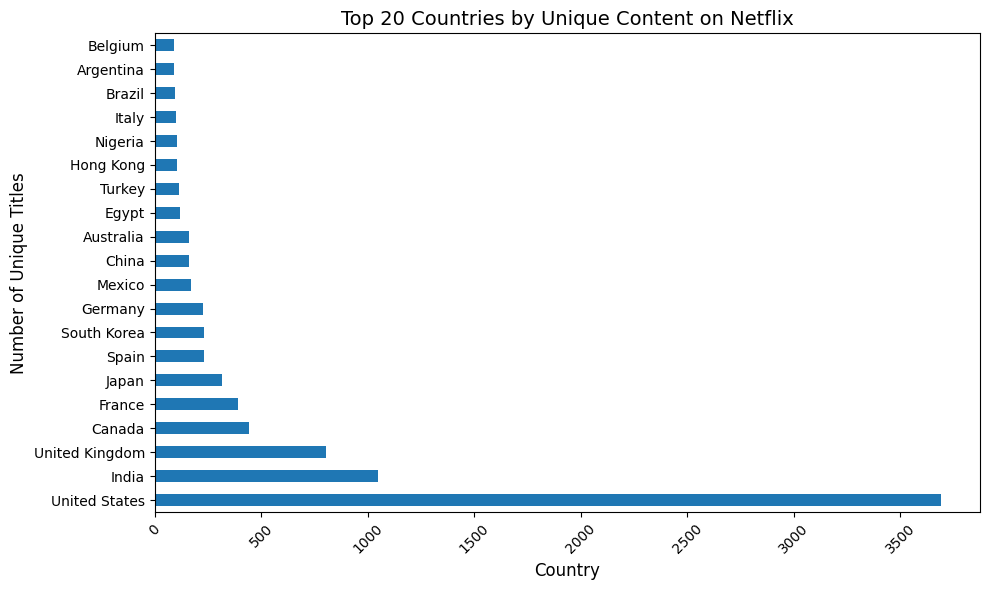

In [30]:
import pandas as pd
import matplotlib.pyplot as plt 

netflix_data = pd.read_csv('netflix_titles.csv') 

netflix_countries_split = netflix_data.dropna(subset=['country']).copy()
netflix_countries_split = netflix_countries_split.assign(
    country=netflix_countries_split['country'].str.split(', ')
).explode('country')

unique_country_counts = netflix_countries_split['country'].value_counts()

plt.figure(figsize=(10, 6))
unique_country_counts.head(20).plot(kind='barh')
plt.title('Top 20 Countries by Unique Content on Netflix', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Unique Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

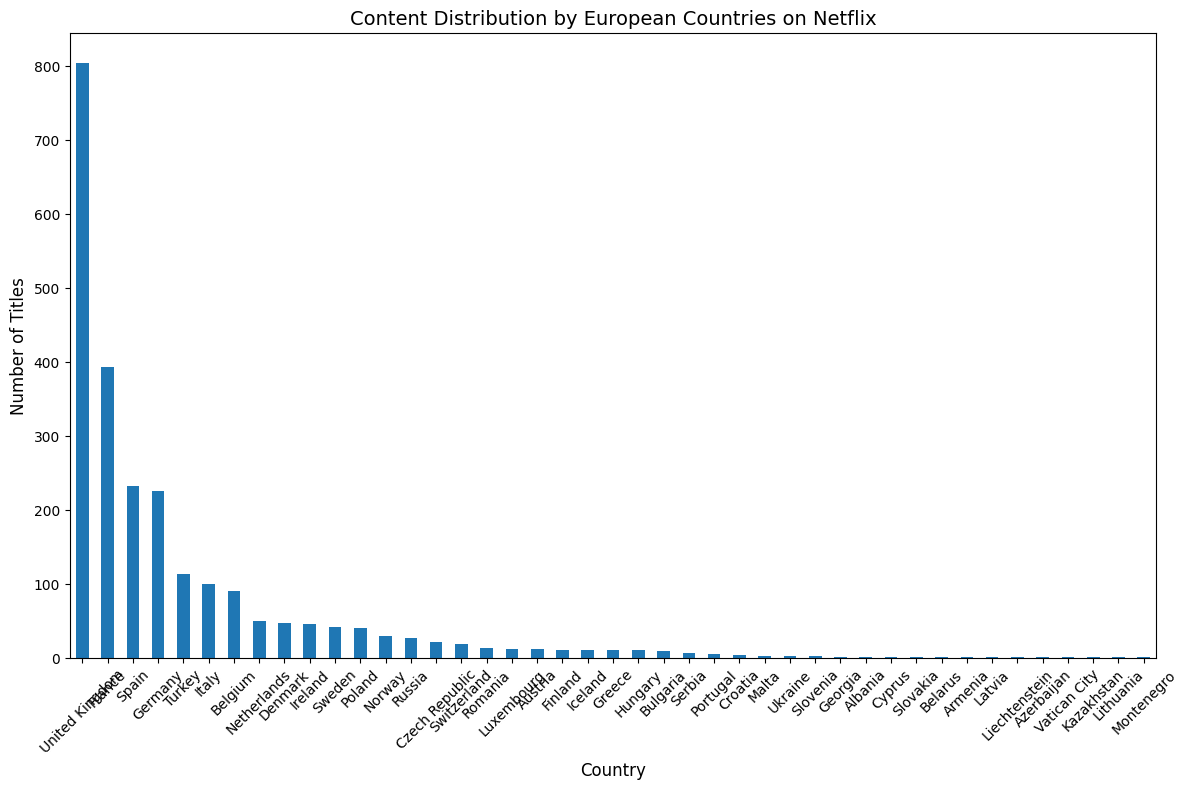

In [31]:
# 유럽분포
european_countries = [
    "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", "Bosnia and Herzegovina",
    "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Georgia", 
    "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kazakhstan", "Kosovo", "Latvia", "Liechtenstein", 
    "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia", 
    "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", 
    "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom", "Vatican City"
]
european_content = netflix_countries_split[netflix_countries_split['country'].isin(european_countries)]

european_country_counts = european_content['country'].value_counts()

plt.figure(figsize=(12, 8))
european_country_counts.sort_values(ascending=False).plot(kind='bar')
plt.title('Content Distribution by European Countries on Netflix', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


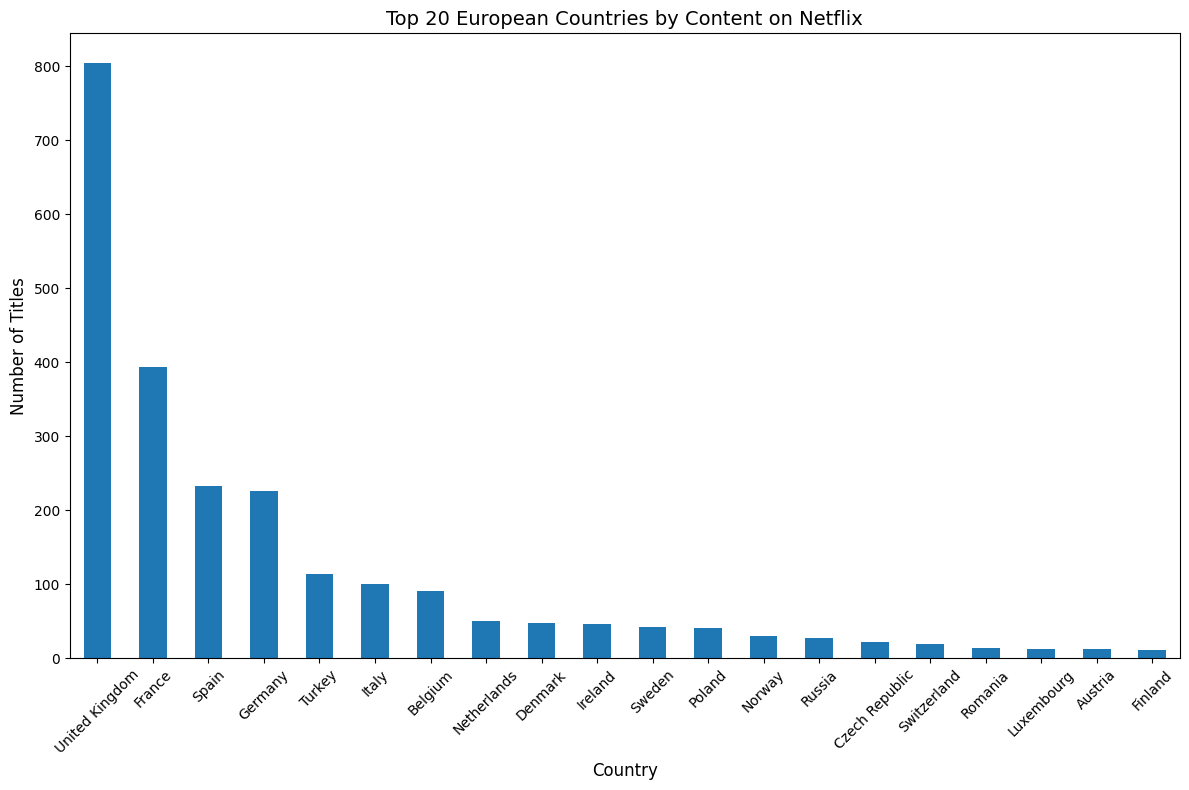

In [32]:
# Get top 20 European countries by content count
top_20_european_countries = european_country_counts.head(20)

# Plot top 20 European countries
plt.figure(figsize=(12, 8))
top_20_european_countries.sort_values(ascending=False).plot(kind='bar')
plt.title('Top 20 European Countries by Content on Netflix', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


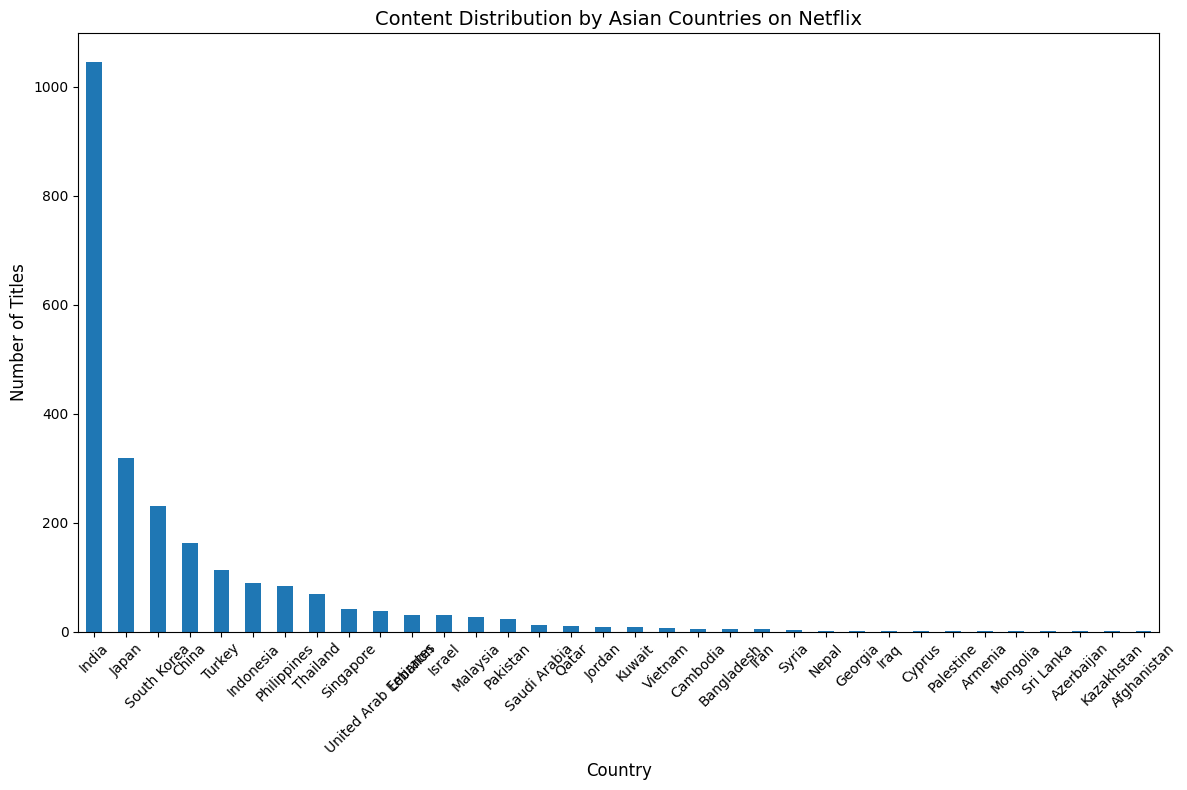

In [33]:
# 아시아
asian_countries = [
    "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", "Cambodia", "China", 
    "Cyprus", "Georgia", "India", "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", 
    "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal", "North Korea", "Oman", 
    "Pakistan", "Palestine", "Philippines", "Qatar", "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka", "Syria", 
    "Tajikistan", "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", 
    "Yemen"
]

netflix_countries_split = netflix_data.dropna(subset=['country']).copy()
netflix_countries_split = netflix_countries_split.assign(
    country=netflix_countries_split['country'].str.split(', ')
).explode('country')

asian_content = netflix_countries_split[netflix_countries_split['country'].isin(asian_countries)]

asian_country_counts = asian_content['country'].value_counts()

plt.figure(figsize=(12, 8))
asian_country_counts.sort_values(ascending=False).plot(kind='bar')
plt.title('Content Distribution by Asian Countries on Netflix', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


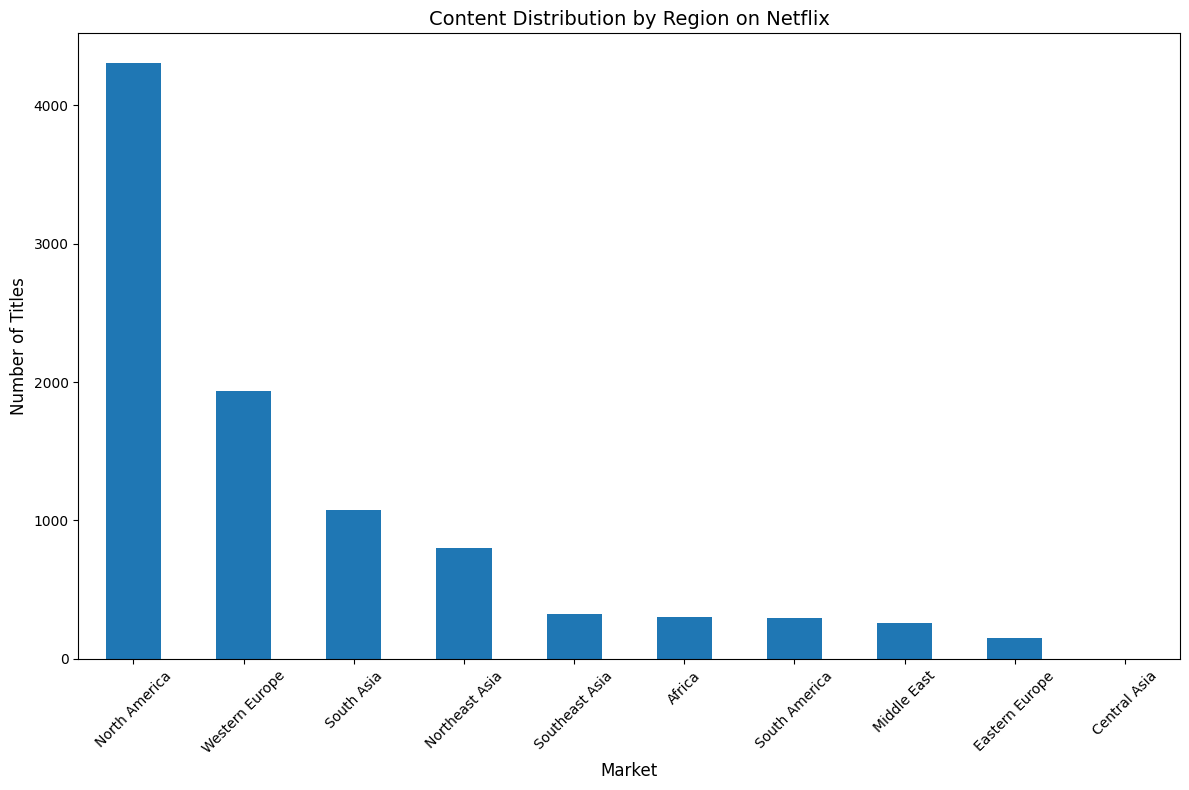

In [34]:
# 마켓별
region_mapping = {
    "Northeast Asia": ["China", "Japan", "South Korea", "Mongolia", "Taiwan"],
    "Southeast Asia": ["Vietnam", "Thailand", "Philippines", "Indonesia", "Malaysia", "Singapore", "Myanmar", "Cambodia", "Laos", "Brunei", "Timor-Leste"],
    "South Asia": ["India", "Pakistan", "Bangladesh", "Sri Lanka", "Nepal", "Maldives", "Bhutan"],
    "Middle East": ["Saudi Arabia", "Iran", "Iraq", "Israel", "Jordan", "Lebanon", "Syria", "Turkey", "Yemen", "United Arab Emirates", "Qatar", "Oman", "Bahrain", "Palestine", "Kuwait"],
    "North America": ["United States", "Canada", "Mexico"],
    "South America": ["Brazil", "Argentina", "Colombia", "Chile", "Peru", "Venezuela", "Ecuador", "Uruguay", "Paraguay", "Bolivia", "Guyana", "Suriname"],
    "Western Europe": ["France", "Germany", "United Kingdom", "Italy", "Spain", "Netherlands", "Belgium", "Switzerland", "Austria", "Luxembourg", "Monaco", "Andorra"],
    "Eastern Europe": ["Russia", "Poland", "Ukraine", "Czech Republic", "Slovakia", "Hungary", "Romania", "Bulgaria", "Serbia", "Croatia", "Bosnia and Herzegovina", "Montenegro", "North Macedonia", "Slovenia", "Belarus", "Georgia", "Armenia", "Azerbaijan", "Moldova"],
    "Africa": ["South Africa", "Nigeria", "Egypt", "Kenya", "Ethiopia", "Ghana", "Morocco", "Algeria", "Tunisia", "Libya", "Sudan"],
    "Central Asia": ["Kazakhstan", "Uzbekistan", "Turkmenistan", "Kyrgyzstan", "Tajikistan"]
}

country_to_region = {country: region for region, countries in region_mapping.items() for country in countries}

netflix_countries_split['region'] = netflix_countries_split['country'].map(country_to_region)

region_counts = netflix_countries_split['region'].value_counts()
plt.figure(figsize=(12, 8))
region_counts.sort_values(ascending=False).plot(kind='bar')
plt.title('Content Distribution by Region on Netflix', fontsize=14)
plt.xlabel('Market', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


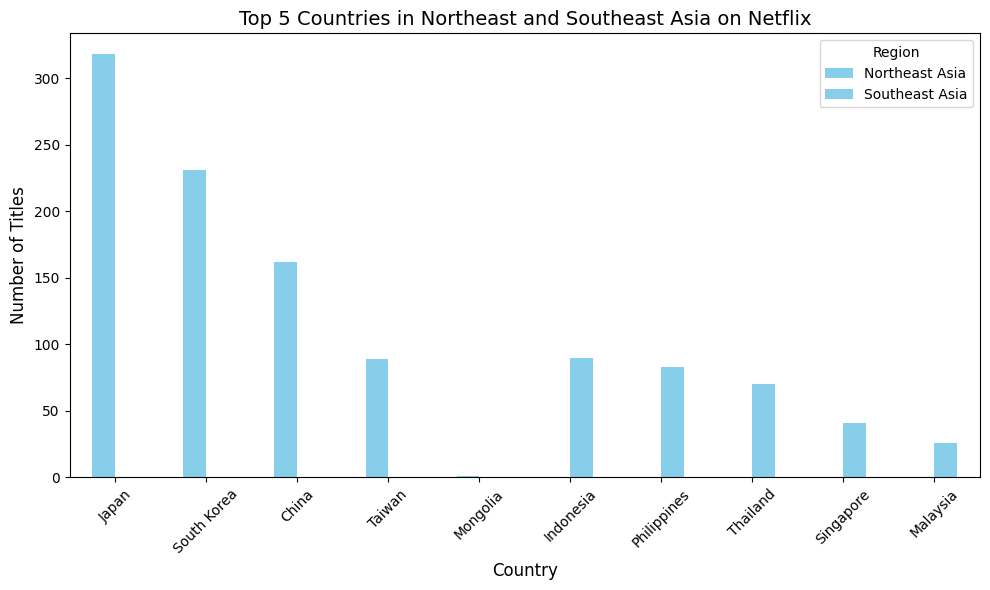

In [35]:
# Filter data for Northeast Asia and Southeast Asia
northeast_asia = region_mapping["Northeast Asia"]
southeast_asia = region_mapping["Southeast Asia"]

northeast_asia_data = netflix_countries_split[netflix_countries_split['country'].isin(northeast_asia)]
southeast_asia_data = netflix_countries_split[netflix_countries_split['country'].isin(southeast_asia)]

northeast_asia_counts = northeast_asia_data['country'].value_counts()
southeast_asia_counts = southeast_asia_data['country'].value_counts()

combined_top_5 = pd.concat([
    northeast_asia_counts.head(5).rename("Northeast Asia"),
    southeast_asia_counts.head(5).rename("Southeast Asia")
], axis=1)

combined_top_5.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 5 Countries in Northeast and Southeast Asia on Netflix', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Region', loc='upper right', labels=['Northeast Asia', 'Southeast Asia'])
plt.tight_layout()
plt.show()



### Family-friendly 관련

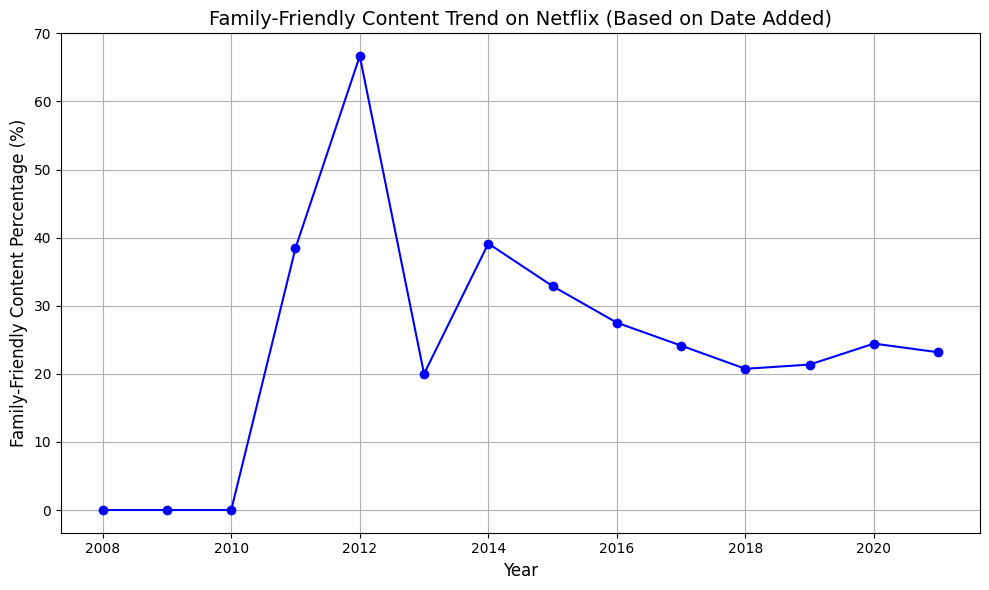

In [36]:
# Define family-friendly ratings
family_friendly_ratings = [
    "G", "PG", "TV-Y", "TV-Y7", "TV-G", "TV-PG"
]

# Create a family-friendly column based on rating
netflix_data['family_friendly'] = netflix_data['rating'].isin(family_friendly_ratings)

# Convert 'date_added' to datetime format if not already
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')

# Extract year from 'date_added'
netflix_data['added_year'] = netflix_data['date_added'].dt.year

# Calculate the family-friendly content percentage by year
family_friendly_trend = netflix_data.groupby('added_year')['family_friendly'].mean() * 100

# Filter for meaningful years
family_friendly_trend = family_friendly_trend.dropna()


# Visualize the trend
plt.figure(figsize=(10, 6))
family_friendly_trend.plot(kind='line', marker='o', color='b')
plt.title('Family-Friendly Content Trend on Netflix (Based on Date Added)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Family-Friendly Content Percentage (%)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()




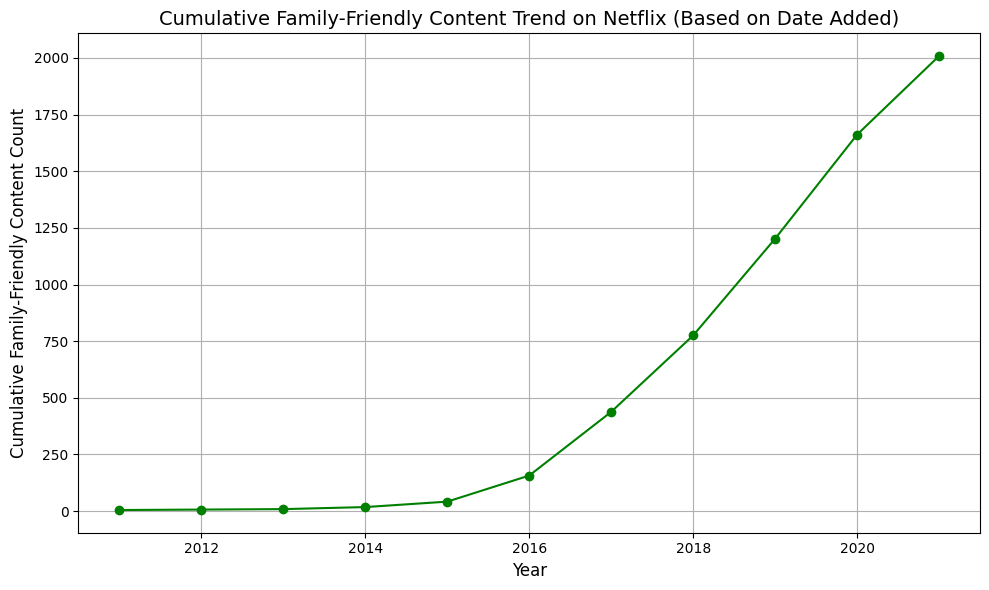

In [37]:
family_friendly_cumulative = netflix_data[netflix_data['family_friendly']].groupby('added_year').size().cumsum()

plt.figure(figsize=(10, 6))
family_friendly_cumulative.plot(kind='line', marker='o', color='g')
plt.title('Cumulative Family-Friendly Content Trend on Netflix (Based on Date Added)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cumulative Family-Friendly Content Count', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()




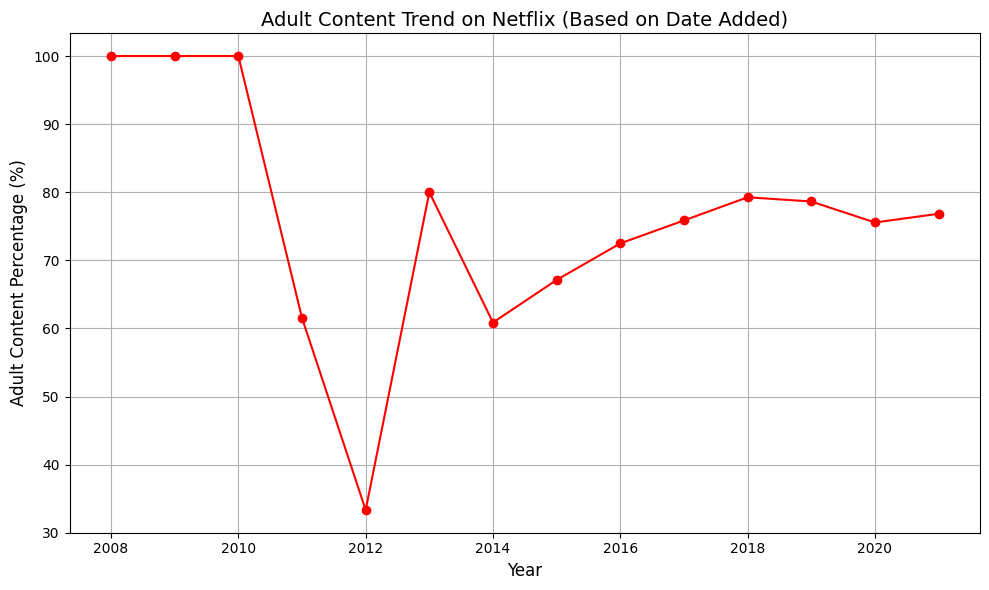

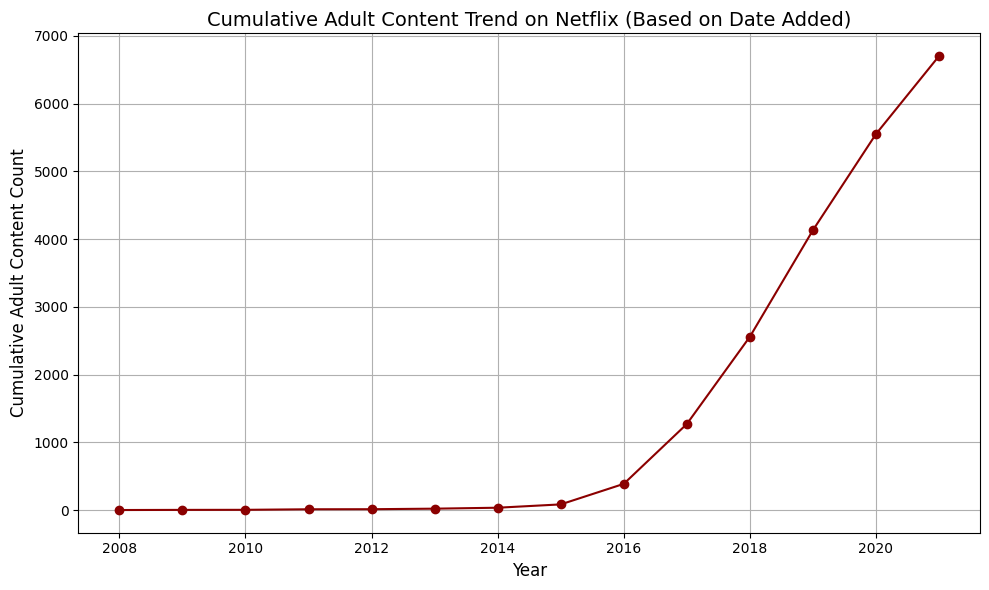

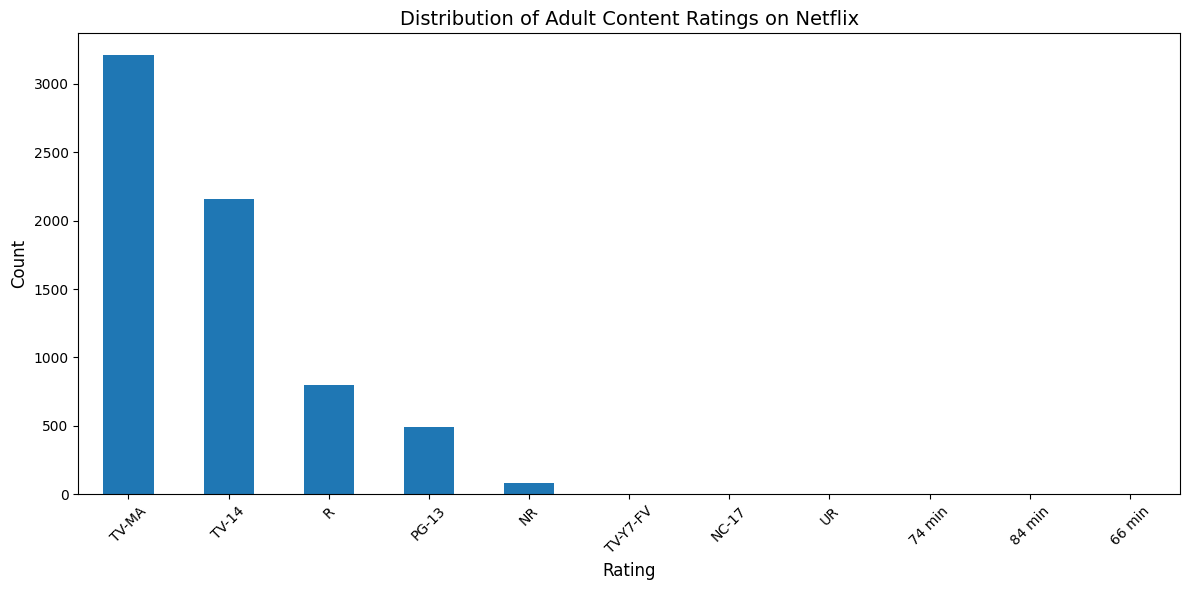

In [38]:
# 연도별 성인 콘텐츠 비율 추이
plt.figure(figsize=(10, 6))
non_family_trend = netflix_data.groupby('added_year')['family_friendly'].apply(lambda x: (~x).mean() * 100)
non_family_trend = non_family_trend.dropna()

non_family_trend.plot(kind='line', marker='o', color='r')
plt.title('Adult Content Trend on Netflix (Based on Date Added)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Adult Content Percentage (%)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
non_family_cumulative = netflix_data[~netflix_data['family_friendly']].groupby('added_year').size().cumsum()

non_family_cumulative.plot(kind='line', marker='o', color='darkred')
plt.title('Cumulative Adult Content Trend on Netflix (Based on Date Added)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cumulative Adult Content Count', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
adult_ratings = netflix_data[~netflix_data['family_friendly']]['rating'].value_counts()
adult_ratings.plot(kind='bar')
plt.title('Distribution of Adult Content Ratings on Netflix', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

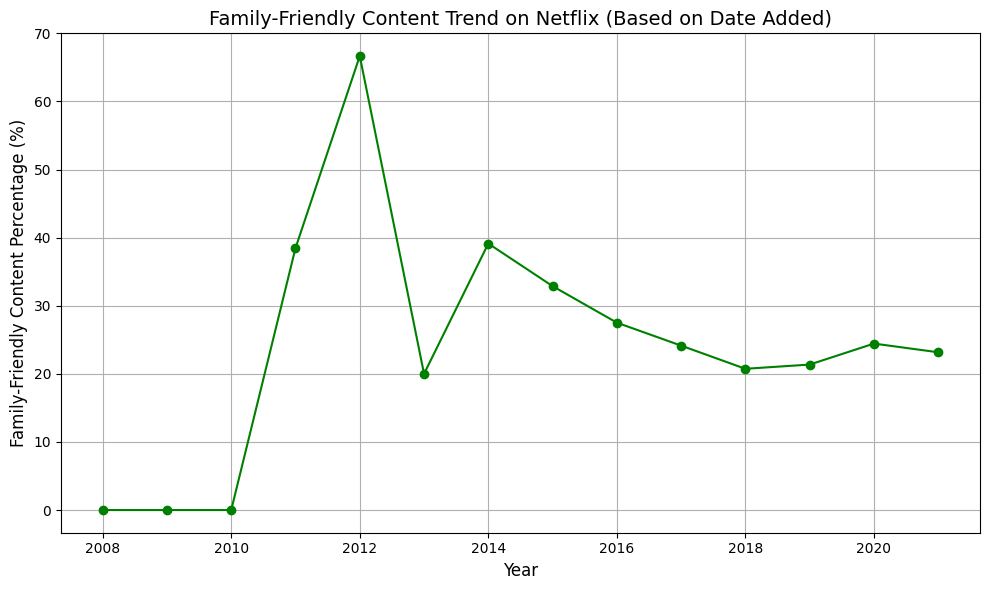


Family-Friendly Content Statistics:
Total Family-Friendly Content: 2052
Total Content: 8807
Overall Family-Friendly Percentage: 23.30%


In [39]:
# 연도별 family-friendly 콘텐츠 비율 추이
plt.figure(figsize=(10, 6))
family_trend = netflix_data.groupby('added_year')['family_friendly'].mean() * 100
family_trend = family_trend.dropna()

family_trend.plot(kind='line', marker='o', color='g')
plt.title('Family-Friendly Content Trend on Netflix (Based on Date Added)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Family-Friendly Content Percentage (%)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nFamily-Friendly Content Statistics:")
total_family = netflix_data['family_friendly'].sum()
total_content = len(netflix_data)
print(f"Total Family-Friendly Content: {total_family}")
print(f"Total Content: {total_content}")
print(f"Overall Family-Friendly Percentage: {(total_family/total_content)*100:.2f}%")

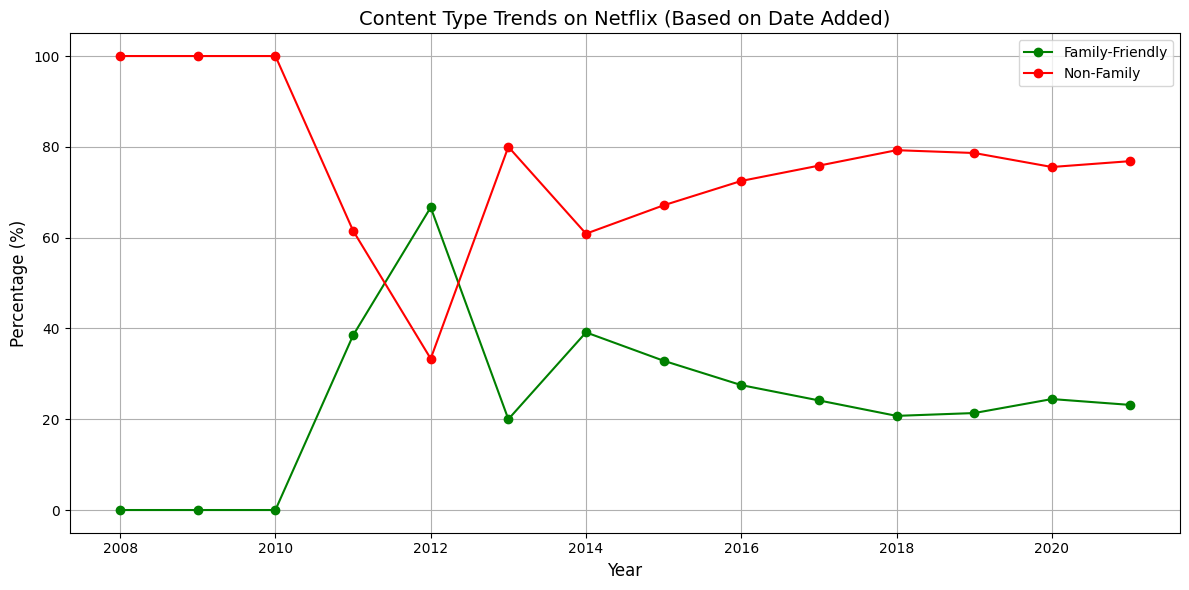


Content Statistics:
Total Family-Friendly Content: 2052 (23.30%)
Total Non-Family Content: 6755 (76.70%)
Total Content: 8807


In [40]:
# family-friendly와 non-family 콘텐츠 비율 추이 비교
plt.figure(figsize=(12, 6))

family_trend = netflix_data.groupby('added_year')['family_friendly'].mean() * 100
family_trend = family_trend.dropna()

non_family_trend = netflix_data.groupby('added_year')['family_friendly'].apply(lambda x: (~x).mean() * 100)
non_family_trend = non_family_trend.dropna()

family_trend.plot(kind='line', marker='o', color='g', label='Family-Friendly')
non_family_trend.plot(kind='line', marker='o', color='r', label='Non-Family')

plt.title('Content Type Trends on Netflix (Based on Date Added)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("\nContent Statistics:")
total_family = netflix_data['family_friendly'].sum()
total_content = len(netflix_data)
print(f"Total Family-Friendly Content: {total_family} ({(total_family/total_content)*100:.2f}%)")
print(f"Total Non-Family Content: {total_content - total_family} ({((total_content-total_family)/total_content)*100:.2f}%)")
print(f"Total Content: {total_content}")

In [41]:
# 연도별 non-family 콘텐츠 수 계산
non_family_counts = netflix_data[~netflix_data['family_friendly']].groupby('added_year').size()

# 전체 콘텐츠 수와 비율도 함께 표시
total_counts = netflix_data.groupby('added_year').size()
non_family_ratio = (non_family_counts / total_counts * 100).round(2)

# 결과를 데이터프레임으로 만들기
results = pd.DataFrame({
    'Non-Family Count': non_family_counts,
    'Total Content': total_counts,
    'Non-Family Percentage (%)': non_family_ratio
})

print("Non-Family Content by Year:")
print(results)

# 전체 통계도 출력
print("\nOverall Statistics:")
total_non_family = netflix_data[~netflix_data['family_friendly']].shape[0]
total_content = len(netflix_data)
print(f"Total Non-Family Content: {total_non_family}")
print(f"Total Content: {total_content}")
print(f"Overall Non-Family Percentage: {(total_non_family/total_content)*100:.2f}%")


Non-Family Content by Year:
            Non-Family Count  Total Content  Non-Family Percentage (%)
added_year                                                            
2008.0                     2              2                     100.00
2009.0                     2              2                     100.00
2010.0                     1              1                     100.00
2011.0                     8             13                      61.54
2012.0                     1              3                      33.33
2013.0                     8             10                      80.00
2014.0                    14             23                      60.87
2015.0                    49             73                      67.12
2016.0                   303            418                      72.49
2017.0                   883           1164                      75.86
2018.0                  1288           1625                      79.26
2019.0                  1572           1999      

In [42]:
# 연도별 family-friendly와 non-family 콘텐츠 수 계산
family_counts = netflix_data[netflix_data['family_friendly']].groupby('added_year').size()
non_family_counts = netflix_data[~netflix_data['family_friendly']].groupby('added_year').size()

total_counts = netflix_data.groupby('added_year').size()
family_ratio = (family_counts / total_counts * 100).round(2)
non_family_ratio = (non_family_counts / total_counts * 100).round(2)


results = pd.DataFrame({
    'Family-Friendly Count': family_counts,
    'Family-Friendly (%)': family_ratio,
    'Non-Family Count': non_family_counts,
    'Non-Family (%)': non_family_ratio,
    'Total Content': total_counts
})

print("Content Distribution by Year:")
print(results)


print("\nOverall Statistics:")
total_family = netflix_data[netflix_data['family_friendly']].shape[0]
total_non_family = netflix_data[~netflix_data['family_friendly']].shape[0]
total_content = len(netflix_data)
print(f"Total Family-Friendly Content: {total_family} ({(total_family/total_content)*100:.2f}%)")
print(f"Total Non-Family Content: {total_non_family} ({(total_non_family/total_content)*100:.2f}%)")
print(f"Total Content: {total_content}")

Content Distribution by Year:
            Family-Friendly Count  Family-Friendly (%)  Non-Family Count  \
added_year                                                                 
2008.0                        NaN                  NaN                 2   
2009.0                        NaN                  NaN                 2   
2010.0                        NaN                  NaN                 1   
2011.0                        5.0                38.46                 8   
2012.0                        2.0                66.67                 1   
2013.0                        2.0                20.00                 8   
2014.0                        9.0                39.13                14   
2015.0                       24.0                32.88                49   
2016.0                      115.0                27.51               303   
2017.0                      281.0                24.14               883   
2018.0                      337.0                20.74    

### 장르 추이

<Figure size 2000x800 with 0 Axes>

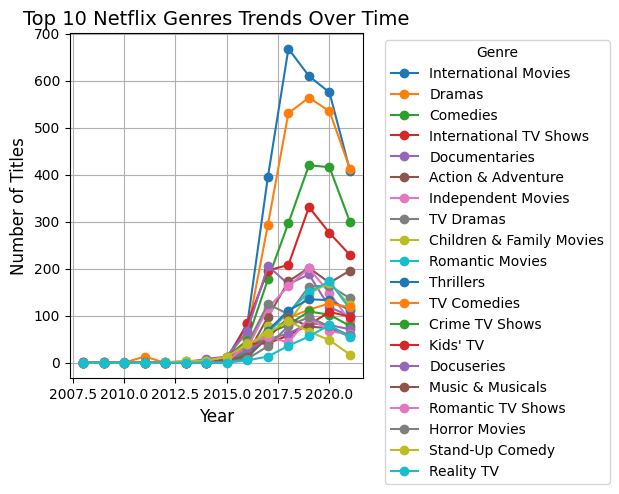


Top 10 Genres Overall:
International Movies: 2752 titles
Dramas: 2427 titles
Comedies: 1674 titles
International TV Shows: 1328 titles
Documentaries: 869 titles
Action & Adventure: 859 titles
Independent Movies: 756 titles
TV Dramas: 739 titles
Children & Family Movies: 641 titles
Romantic Movies: 616 titles
Thrillers: 577 titles
TV Comedies: 550 titles
Crime TV Shows: 459 titles
Kids' TV: 433 titles
Docuseries: 380 titles
Music & Musicals: 375 titles
Romantic TV Shows: 364 titles
Horror Movies: 357 titles
Stand-Up Comedy: 343 titles
Reality TV: 244 titles


In [53]:
# 장르 추이 분석
# 장르 데이터 전처리
genre_data = netflix_data.dropna(subset=['listed_in']).copy()
genre_data = genre_data.assign(
    listed_in=genre_data['listed_in'].str.split(', ')
).explode('listed_in')

# 연도별 장르 카운트
genre_trends = genre_data.groupby(['added_year', 'listed_in']).size().unstack(fill_value=0)

top_genres = genre_trends.sum().sort_values(ascending=False).head(20)

# 시각화
plt.figure(figsize=(20, 8))
genre_trends[top_genres.index].plot(kind='line', marker='o')
plt.title('Top 10 Netflix Genres Trends Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 상위 10개 장르와 각각의 총 콘텐츠 수 출력
print("\nTop 10 Genres Overall:")
for genre, count in top_genres.items():
    print(f"{genre}: {int(count)} titles")